In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

# Store data path in variable named pata
path = '/content/drive/My Drive/Macro Final/'

Mounted at /content/drive


In [ ]:
############################################################ FIRM ############################################################

In [ ]:
# BTS Number of People on Airlines
num_on_airlines = pd.read_excel(path + 'BTS/BTS - Figure 1 Dec 2020 Air Traffic Table.xlsx')
num_on_airlines = num_on_airlines.rename(columns={'Unnamed: 0':'Year', 'U.S. Airline Jan-Dec Passengers':'Number of Passengers'})
num_on_airlines.plot(x='Year', y='Number of Passengers', legend=False)
plt.ylabel('Number of Passengers per Year (Millions)')
plt.title('Total Passengers on U.S. Airlines')

# Interpret:
#   - The total number of people flying in 2020 decreased significantly from other years

,Year,Number of Passengers
0,2003,647.468000
1,2004,703.691000
2,2005,738.628000
3,2006,744.723000
4,2007,769.623000
5,2008,743.314000
6,2009,703.899000
7,2010,720.495000
8,2011,730.797000
9,2012,736.700552


January Percent Change: 4.55
February Percent Change: 1.74
March Percent Change: -53.35
April Percent Change: -95.77


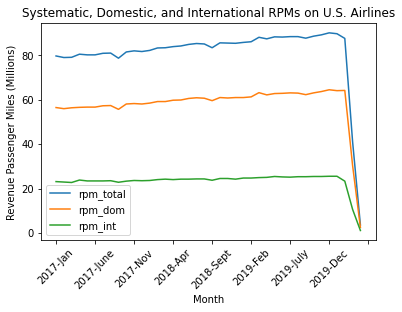

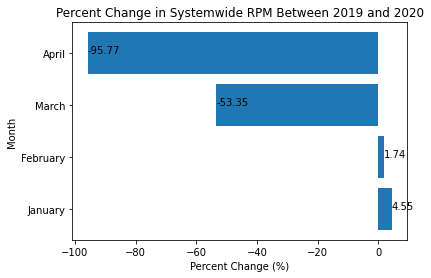

January Percent Change: 4.38
February Percent Change: 3.36
March Percent Change: 5.64
April Percent Change: 4.17


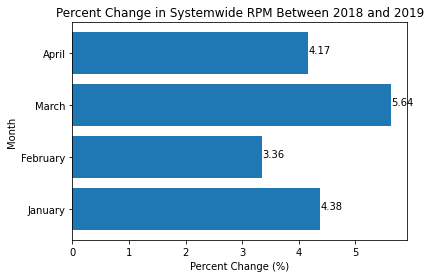

January Percent Change: 3.14
February Percent Change: 5.44
March Percent Change: 5.44
April Percent Change: 4.22


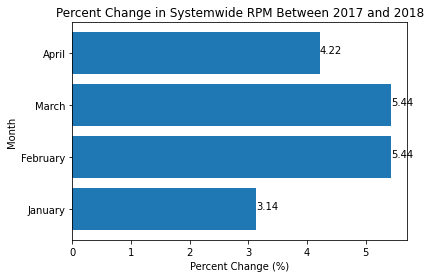

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 11 Text major ticklabel objects>)

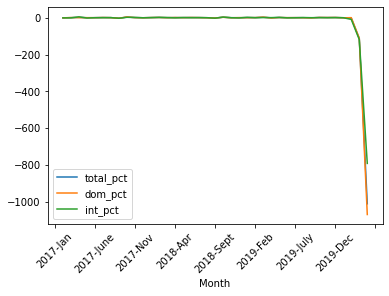

In [ ]:
# BTS RPMs Domestic and International
rpm_total = pd.read_excel(path + 'BTS/Systemwide RPM.xlsx')
rpm_dom = pd.read_excel(path + 'BTS/Domestic RPM.xlsx')
rpm_int = pd.read_excel(path + 'BTS/International RPM.xlsx')

# define variables
df = pd.DataFrame()
years = [2017, 2018, 2019, 2020]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

# format data
labels = []
for i in range(0, 4):
  for j in range(0, 12):
    labels.append(str(years[i]) + '-' + str(months[j]))

for x in [rpm_total, rpm_dom, rpm_int]:
  x.rename(columns={'Unnamed: 0' : 'Month'}, inplace=True)
  x.set_index('Month', inplace=True)
  rpm_list = []
  for i in range(0, 4):
    for j in range(0, 12):
      if (np.isnan(x.iloc[j, i])==False):
        rpm_list.append(x.iloc[j, i])
  if x.equals(rpm_total):
    y = 'rpm_total'
  elif x.equals(rpm_dom):
    y = 'rpm_dom'
  elif x.equals(rpm_int):
    y = 'rpm_int'
  df[y] = rpm_list
  df['Month'] = labels[0:40]
  df.set_index('Month', inplace=True)
df.plot()
plt.ylabel('Revenue Passenger Miles (Millions)')
plt.title('Systematic, Domestic, and International RPMs on U.S. Airlines')
plt.xticks(rotation=45)

# stats
# percent change 2019-2020
def graph_yearly_change(startYear, endYear):
  mon_short = ['January', 'February', 'March', 'April']
  pnt_change = []
  for x in mon_short:
    pct_change_year = ((rpm_total.at[x, endYear] - rpm_total.at[x, startYear]) / rpm_total.at[x, startYear])*100
    pct_change_year = round(pct_change_year, 2)
    pnt_change.append(pct_change_year)
    print(x + " Percent Change: " + str(pct_change_year))

  plt.figure()
  plt.barh(mon_short, pnt_change)
  for index, value in enumerate(pnt_change):    # add values to bar graph
      plt.text(value, index, str(value))

  plt.title('Percent Change in Systemwide RPM Between ' + startYear + ' and ' + endYear)
  plt.xlabel('Percent Change (%)')
  plt.ylabel('Month')
  plt.show()

# can show yearly change between any years 2017-2020 (only jan-april because of limited 2020 data)
graph_yearly_change('2019', '2020')
graph_yearly_change('2018', '2019')
graph_yearly_change('2017', '2018')

# percent change by month
df['total_pct'] = (df['rpm_total'].diff()/df['rpm_total'])*100
df['dom_pct'] = (df['rpm_dom'].diff()/df['rpm_dom'])*(100)
df['int_pct'] = (df['rpm_int'].diff()/df['rpm_int'])*(100)

df[['total_pct', 'dom_pct', 'int_pct']].plot()
plt.xticks(rotation=45)


# Interpret:
#   - RPM is the number of miles traveled by a paying customer (1 RPM = 1 mile traveled by 1 customer). Therefore, these graphs show a significant decline
#     in the number of miles traveled both domestically and internationally.
#       - From BTS: Revenue passenger miles are computed by summation of the products of the revenue aircraft miles on each interairport segment multiplied by the number of revenue passengers carried on that segment.
#   - From 2019 to 2020, RPM decreased by almost 53% in March and 96% in April, where it had only decreased by 2% in January and 6% in February.
#   - Percent changes between other years without a travel ban are between 3%-6%
#   - Domestic and International air travel decreased by around the same percent.

In [ ]:
# BTS Number of Employees
numEmp22 = pd.read_csv(path + 'BTS/numberofemployees.csv')

[187562314.07000002, 202525621.62, 211377117.38, 93046231.5, 149460429.74]


Text(0, 0.5, 'Revenue (Billions)')

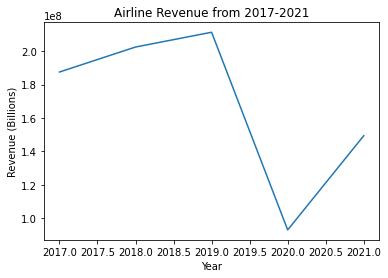

In [ ]:
# Firm Revenue - Airline
stats_21 = pd.read_csv(path + 'BTS/revenue21.csv')
stats_20 = pd.read_csv(path + 'BTS/revenue20.csv')
stats_19 = pd.read_csv(path + 'BTS/revenue19.csv')
stats_18 = pd.read_csv(path + 'BTS/revenue18.csv')
stats_17 = pd.read_csv(path + 'BTS/revenue17.csv')

tables = [stats_17, stats_18, stats_19, stats_20, stats_21]

tot_rev = []
for y in tables:
  y = y[y['UNIQUE_CARRIER_NAME'] != 'Federal Express Corporation']
  tot = y['OP_REVENUES'].sum()
  tot_rev.append(tot)
print(tot_rev)

plt.plot([2017, 2018, 2019, 2020, 2021], tot_rev)
plt.title('Airline Revenue from 2017-2021')
plt.xlabel('Year')
plt.ylabel('Revenue (Billions)')

1946609

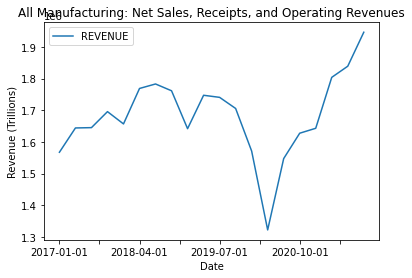

In [ ]:
# Firm Revenue - Goods/Services (Manufacturing)
manurev = pd.read_csv(path + 'FRED/manufacturingrev.csv')
manurev.rename(columns={'QFR101MFGUSNO':'REVENUE'}, inplace=True)
manurev = manurev[manurev['DATE'] >= '2017-01-01']
manurev = manurev.set_index('DATE')
manurev.plot()
plt.title('All Manufacturing: Net Sales, Receipts, and Operating Revenues')
plt.xlabel('Date')
plt.ylabel('Revenue (Trillions)')

manurev['REVENUE'].min() # 1321976
manurev['REVENUE'].max() # 1946609

Percent change: 8.18081887474715%
Percent change: 6.50025905034049%
Percent change: 287.96550663056337%
Percent change: 107.258824915928%


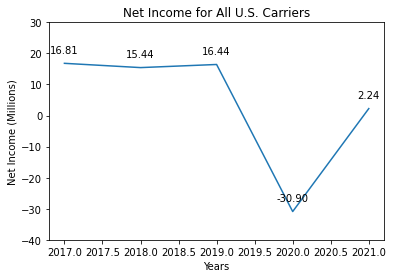

In [ ]:
# Net Income (Thousands of Dollars, All U.S. Carriers)
netincome = pd.read_excel(path + 'BTS/NetIncome.xlsx')

# find total net income between all U.S. airlines
total_nincome = netincome.sum(axis=1)
netincome['total'] = total_nincome

total_years = []
for x in range(2017, 2022):
  sum_year = netincome[netincome['Year'] == x]['total'].sum()
  sum_year_adj = sum_year/1000000
  total_years.append(sum_year_adj)

plt.plot(range(2017,2022), total_years)
plt.title('Net Income for All U.S. Carriers')
plt.xlabel('Years')
plt.ylabel('Net Income (Millions)')

for x,y in zip(range(2017,2022), total_years):
  label = "{:.2f}".format(y)

  plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

plt.ylim([-40, 30])

for x in range(1, len(total_years)):
  num = total_years[x] - total_years[x-1]
  den = total_years[x-1]
  print("Percent change: " + str(abs((num/den)*100)) + '%')

# Interpret:
#   - includes net income from domestic, international, Latin America, Atlantic, and Pacific flights

In [ ]:
# Investment (net domestic private investment: domestic business; billions of dollars)
invest = pd.read_csv(path + 'FRED/invest.csv')
invest = invest.rename(columns = {'W790RC1Q027SBEA':'Investment'})

i_20 = invest[(invest['DATE'] >= '2020-01-01') & (invest['DATE']<='2020-10-01')]
i20 = i_20['Investment'].sum()/len(i_20)

i_19 = invest[(invest['DATE'] >= '2019-01-01') & (invest['DATE']<='2019-10-01')]
i19 = i_19['Investment'].sum()/len(i_19)

changei = ((i20 - i19)/i19)*100
print("2019-2020: " + str(changei))

2019-2020: -50.26226208694401


In [ ]:
############################################################ CONSUMER ############################################################

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text major ticklabel objects>)

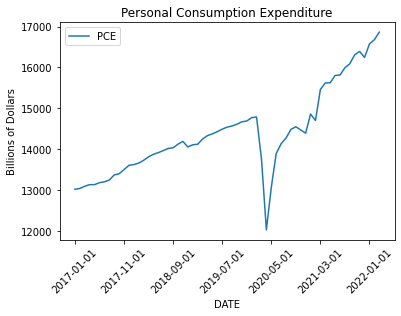

In [ ]:
# Consumer Spending (total)
consume = pd.read_csv(path + 'FRED/PCE.csv')
consume = consume[consume['DATE'] >= '2017-01-01']
consume.set_index('DATE', inplace=True)
consume.plot()
plt.title('Personal Consumption Expenditure')
plt.ylabel('Billions of Dollars')
plt.xticks(rotation=45)

In [ ]:
# Consumer Spending (airline)
consume_air = pd.read_csv(path + 'FRED/airconsumption.csv')
con_air = consume_air.rename(columns={'DAITRC1A027NBEA':'Air Expenditure'})
con = con_air[con_air['DATE'] > '2010-01-01']
con.set_index('DATE', inplace=True)
con.plot()
plt.title('Personal Consumption on Air Transportation')
plt.ylabel('Billions of Dollars')
plt.xticks(rotation=45)

In [ ]:
# Labor Supply
unemp = pd.read_csv(path + 'FRED/UNEMPLOY.csv')

unemp_20 = unemp[(unemp['DATE'] >= '2020-01-01') & (unemp['DATE']<='2020-10-01')]
unemp20 = unemp_20['UNEMPLOY'].sum()/len(unemp_20)

unemp_19 = unemp[(unemp['DATE'] >= '2019-01-01') & (unemp['DATE']<='2019-10-01')]
unemp19 = unemp_19['UNEMPLOY'].sum()/len(unemp_19)

changeU = ((unemp20 - unemp19)/unemp19)*100
print("2019-2020: " + str(changeU))

2019-2020: 122.2644831251661


In [ ]:
############################################################ GOVERNMENT ############################################################

2019-2020: 25.42974799841825


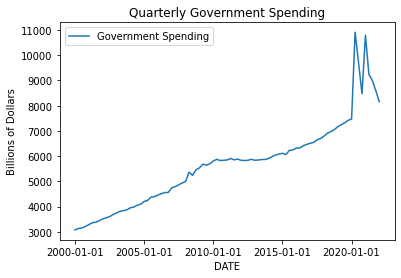

In [ ]:
# Government Spending (quarterly)
gov_spend = pd.read_csv(path + 'FRED/GovSpending.csv')
gov = gov_spend[gov_spend['DATE'] >= '2000-01-01']
gov = gov.rename(columns={'W068RCQ027SBEA':'Government Spending'})

g_20 = gov[(gov['DATE'] >= '2020-01-01') & (gov['DATE']<='2020-10-01')]
av20 = g_20['Government Spending'].sum()/len(g_20)

g_19 = gov[(gov['DATE'] >= '2019-01-01') & (gov['DATE']<='2019-10-01')]
av19 = g_19['Government Spending'].sum()/len(g_19)

change = ((av20 - av19)/av19)*100
print("2019-2020: " + str(change))

gov.set_index('DATE', inplace=True)
gov.plot()
plt.title('Quarterly Government Spending')
plt.ylabel('Billions of Dollars')
plt.show()

In [ ]:
############################################################ ECONOMY ############################################################

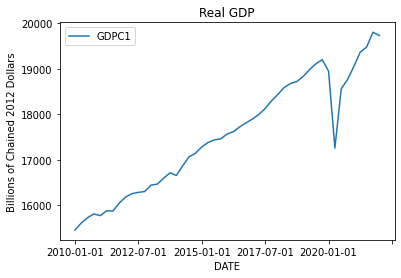

In [ ]:
# Real GDP (chained 2012 dollars)
gdp = pd.read_csv(path + 'FRED/GDPC1.csv')
gdp = gdp[gdp['DATE']>='2010-01-01']
gdp.set_index('DATE', inplace=True)
gdp.plot()
plt.title('Real GDP')
plt.ylabel('Billions of Chained 2012 Dollars')

gdp.reset_index(inplace=True)
fil = gdp[gdp['DATE']<'2020-01-01']
maxi = fil['GDPC1'].max()

filt = gdp[gdp['DATE']>='2020-01-01']
mini = filt['GDPC1'].min()

diff = maxi - mini

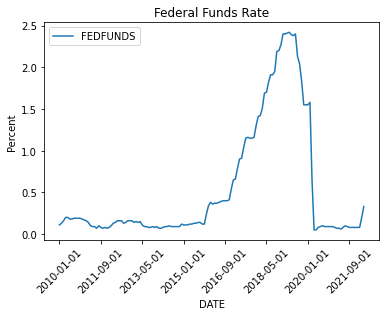

Maximum rate: 2.42 on 2019-04-01
Minimum rate: 0.05 on 2020-04-01


In [ ]:
# Federal Funds Rate
fedfunds = pd.read_csv(path + 'FRED/FEDFUNDS.csv')
fed = fedfunds[fedfunds['DATE'] >= '2010-01-01']

# graphing
fed.set_index('DATE', inplace=True)
fed.plot()
plt.xticks(rotation=45)
plt.title('Federal Funds Rate')
plt.ylabel('Percent')
plt.show()

# stats
fed.reset_index(inplace=True)
fedy = fed[fed['DATE'] >= '2017-01-01']
print('Maximum rate: ' + str(fedy['FEDFUNDS'].max()) + ' on 2019-04-01')
print('Minimum rate: ' + str(fedy['FEDFUNDS'].min()) + ' on 2020-04-01')

# Interpret:
#   - rate that banks charge each other for overnight lending
#   - used because it changes daily, reflects changes in the market (Fed does change through OMOs - buying/selling gov bonds), influences many other
#     rates so it is a good measure of what will happen in the entire economy
#   - maximum of 2.42% in April 2019, minimum of .05% in April 2020